<a href="https://colab.research.google.com/github/Faiza-makhdoom/ASU-CNN/blob/main/Proposed_ASU_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

50000 train samples
10000 test samples


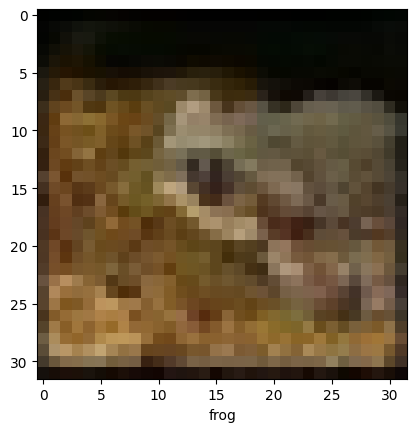

In [ ]:
# Let's look at a one image
IMG_INDEX = 4792  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
from keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
def asu(x):
    return x * K.sin(x)

get_custom_objects().update({'asu': Activation(asu)})

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='asu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='asu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='asu'))

In [ ]:
model.layers[0].get_weights()[1]


array([-0.0764751 ,  0.17409152,  0.18175842,  0.1025468 , -0.01536353,
       -0.04749295,  0.12119454, -0.03554969, -0.0527476 , -0.28756508,
       -0.10427073, -0.15750109,  0.21896514, -0.26292366, -0.09909194,
       -0.19790103,  0.09665565,  0.09548382, -0.12846418, -0.02248034,
       -0.17396623,  0.15520237,  0.26431257, -0.1641247 , -0.19119638,
       -0.02951036,  0.09495942,  0.0563251 ,  0.14831258,  0.20683618,
        0.05431882, -0.03388625], dtype=float32)

In [ ]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='asu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

defaults of Adam

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

set learning rate to zero to apply learning rate scheduals

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.000, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.0,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
    plt.ylabel('Learning rate')
    plt.show()

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math
initial_learning_rate = 0.001
# In learning rate scheduler epoch number starts from 0
def lr_exp_decay(epoch, lr):
    k = 0.1 #decay rate
    return initial_learning_rate * math.exp(-k*epoch)
history = model.fit(train_images, train_labels, epochs=20, callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
                    validation_data=(test_images, test_labels))



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
1563/1563 [==============================] - 20s 6ms/step - loss: 1.7353 - accuracy: 0.3661 - val_loss: 1.3827 - val_accuracy: 0.4933 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374180359595.
Epoch 2/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3123 - accuracy: 0.5296 - val_loss: 1.2102 - val_accuracy: 0.5644 - lr: 9.0484e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008187307530779819.
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1354 - accuracy: 0.5989 - val_loss: 1.1484 - val_accuracy: 0.5992 - lr: 8.1873e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007408182206817179.
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0154 - accuracy: 0.6426 - val_loss: 1.0652 - val_accuracy: 0.6248 - lr: 7.4082e-04

Epoch 5: LearningRateScheduler setting learning rate t

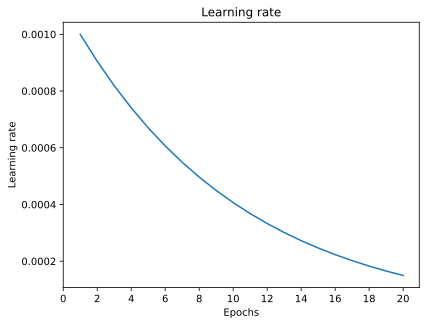

In [ ]:
plot_lr(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.0902 - accuracy: 0.6816 - 715ms/epoch - 2ms/step
0.6815999746322632


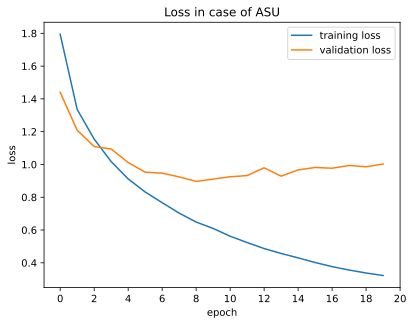

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss in case of ASU')
plt.xticks(range(0,21,2))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.show()

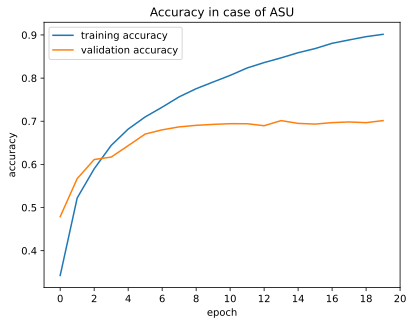

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy in case of ASU')
plt.xticks(range(0,21,2))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
from matplotlib import pyplot

In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'flatten',
 'dense',
 'dense_1']

In [ ]:
# summarize feature map shapes
for i in range(len(model.layers)):
 layer = model.layers[i]
 # summarize output shape
 print(i, layer.name, layer.output.shape)

0 conv2d (None, 30, 30, 32)
1 max_pooling2d (None, 15, 15, 32)
2 conv2d_1 (None, 13, 13, 64)
3 max_pooling2d_1 (None, 6, 6, 64)
4 conv2d_2 (None, 4, 4, 64)
5 flatten (None, 1024)
6 dense (None, 64)
7 dense_1 (None, 10)


In [ ]:
# summarize feature map shapes
for i in range(len(model.layers)):
 layer = model.layers[i]
 # check for convolutional layer
 if 'conv' not in layer.name:
  continue
 # summarize output shape
 print(i, layer.name, layer.output.shape)

0 conv2d (None, 30, 30, 32)
2 conv2d_1 (None, 13, 13, 64)
4 conv2d_2 (None, 4, 4, 64)


1/1 [==============================] - 0s 134ms/step


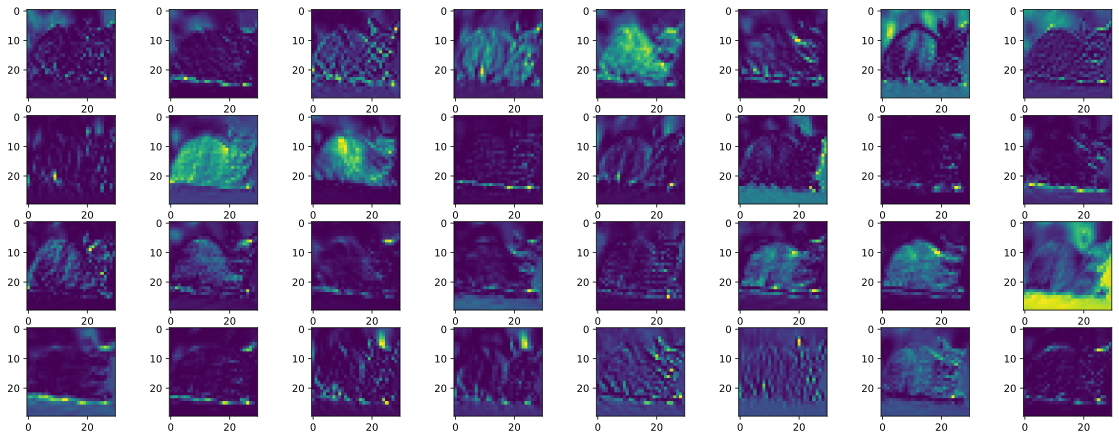

In [ ]:
# redefine model to output right from the first hidden layer
feature_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
img_path='/content/cato.jpg'
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# get feature map for first hidden layer
feature_maps = feature_model.predict(x)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,feature_maps.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(feature_maps[0,:,:,i-1] , cmap='viridis')

pyplot.show()

1/1 [==============================] - 0s 86ms/step


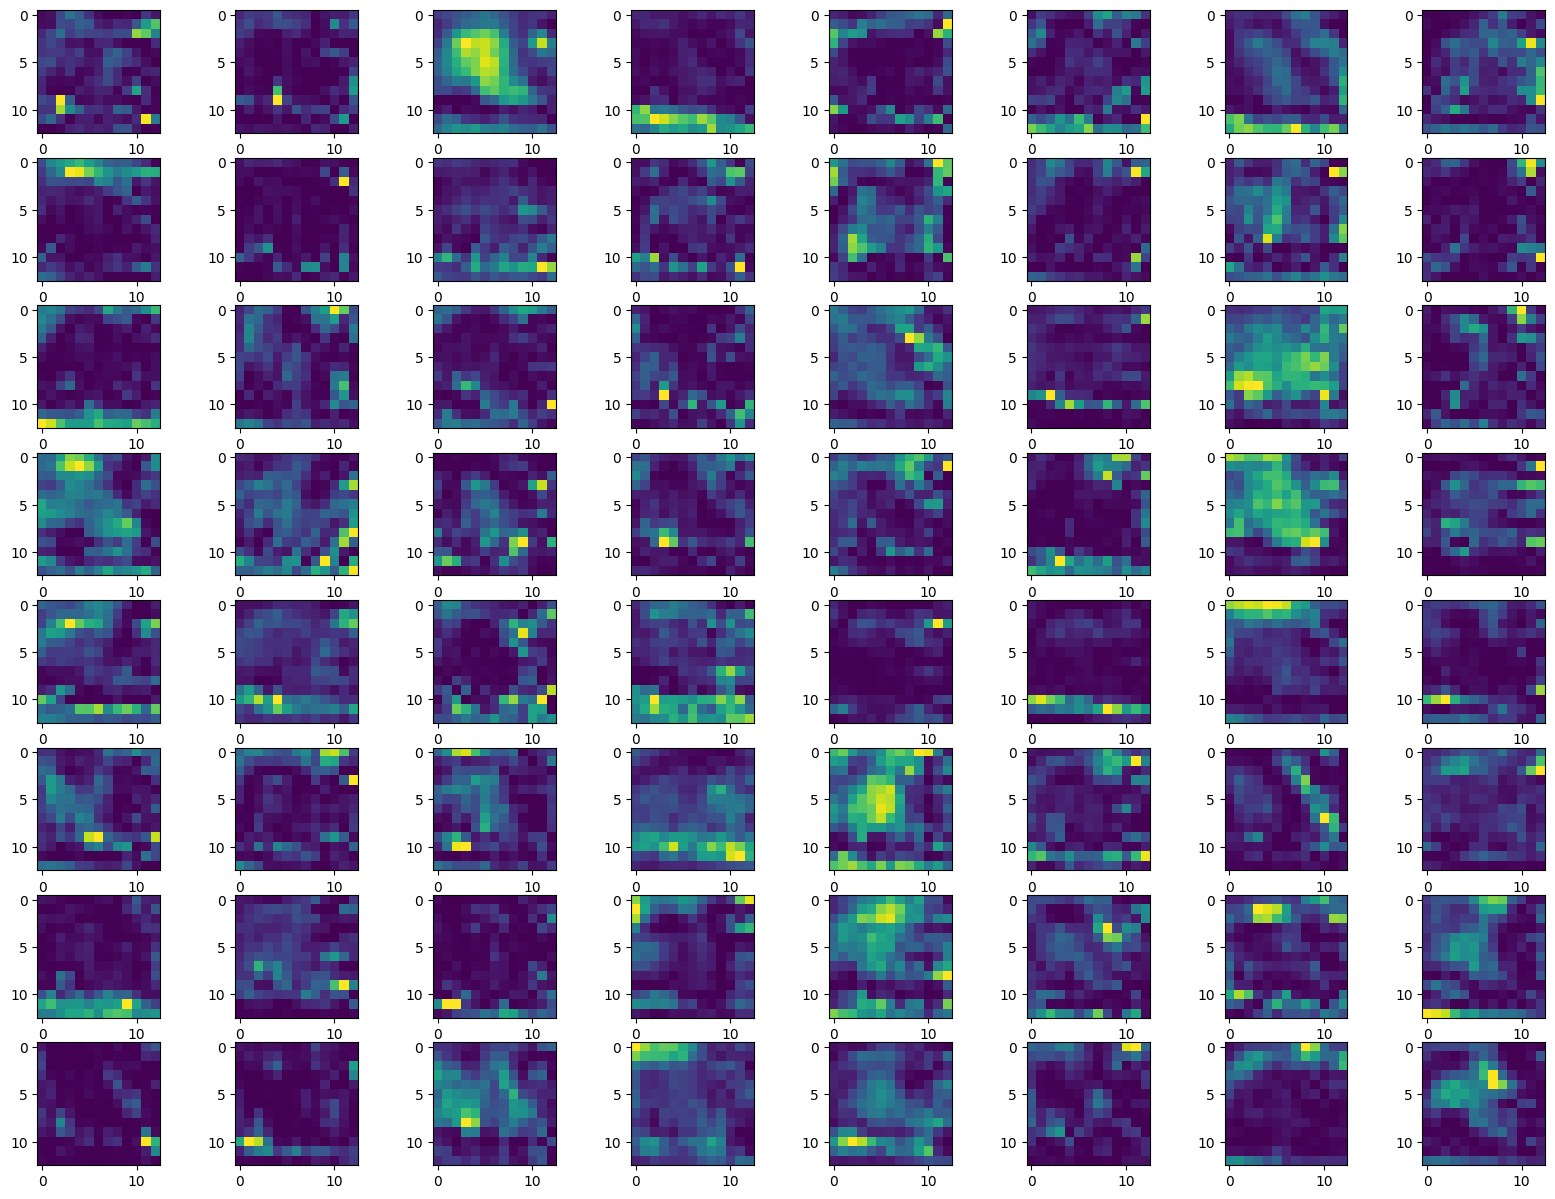

In [ ]:
# redefine model to output right from the first hidden layer
feature_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
img_path='/content/cato.jpg'
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# get feature map for first hidden layer
feature_maps = feature_model.predict(x)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,feature_maps.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(feature_maps[0,:,:,i-1] , cmap='viridis')

pyplot.show()

1/1 [==============================] - 0s 126ms/step


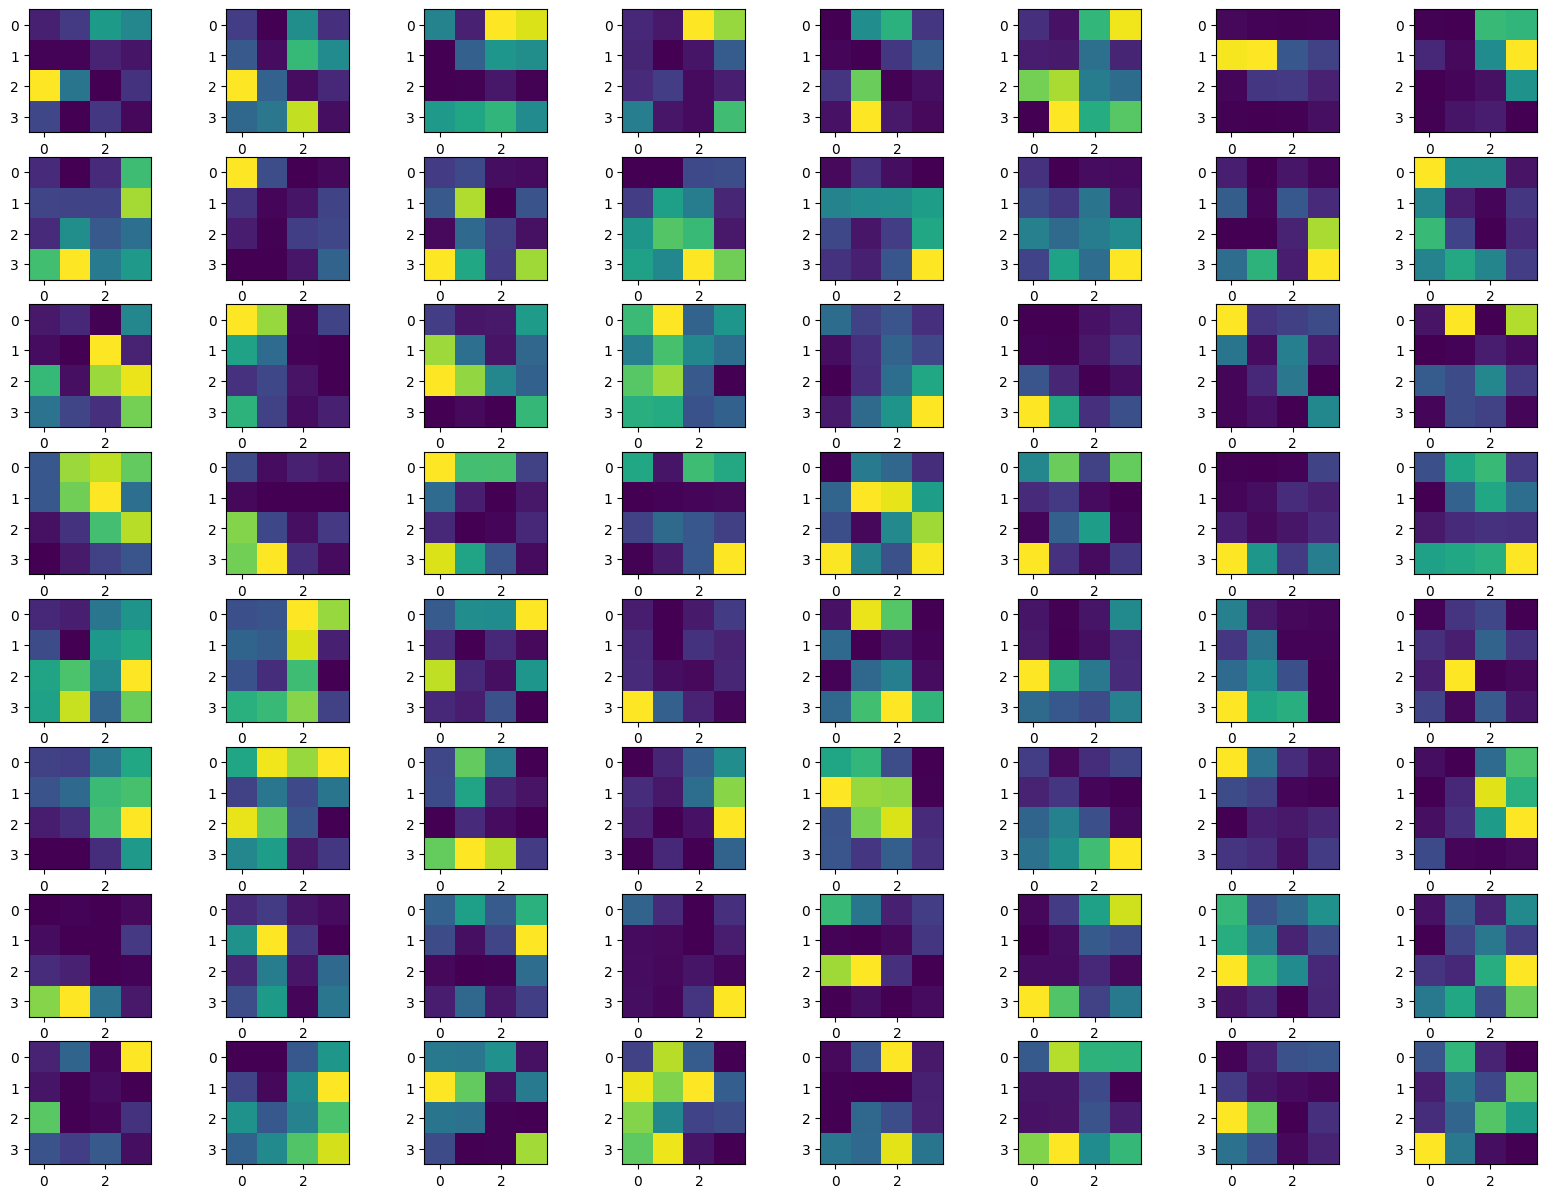

In [ ]:
# redefine model to output right from the first hidden layer
feature_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[4].output)
img_path='/content/cato.jpg'
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# get feature map for first hidden layer
feature_maps = feature_model.predict(x)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,feature_maps.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(feature_maps[0,:,:,i-1] , cmap='viridis')

pyplot.show()

In [ ]:
successive_outputs = [layer.output for layer in model.layers[0:]]
successive_outputs

[<KerasTensor: shape=(None, 30, 30, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 15, 15, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 6, 6, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 4, 4, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

1/1 [==============================] - 0s 241ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


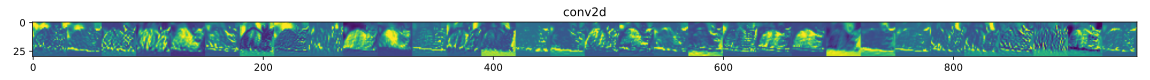

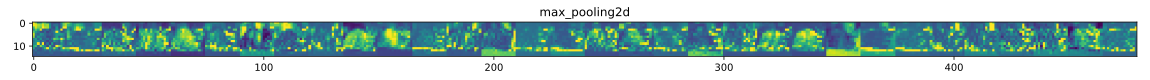

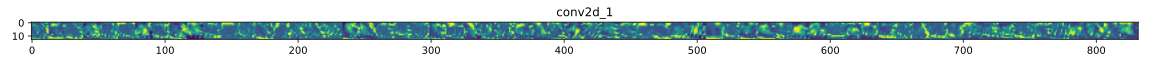

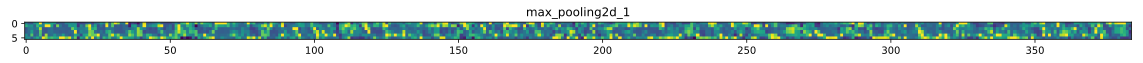

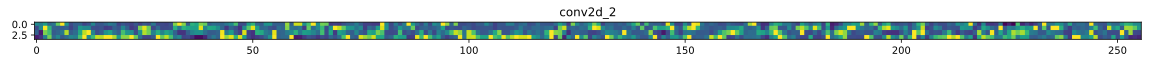

In [ ]:
img_path='/content/cato.jpg'
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 83ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


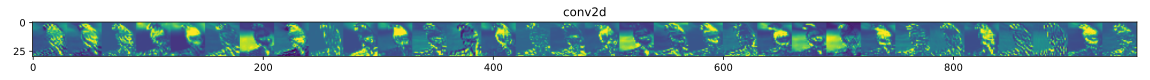

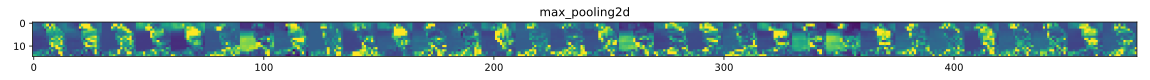

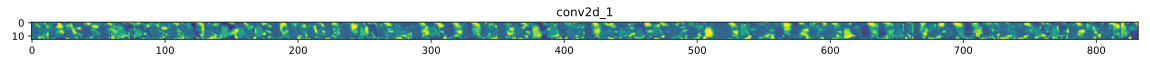

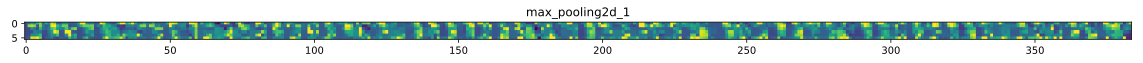

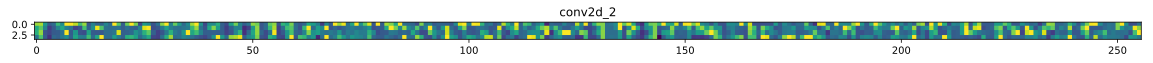

In [ ]:
img_path='/content/bird.jpg'
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 83ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


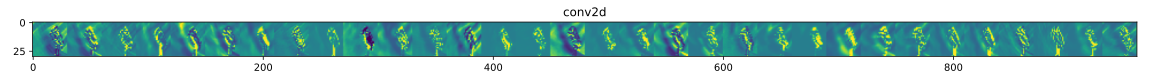

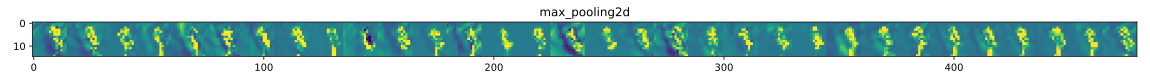

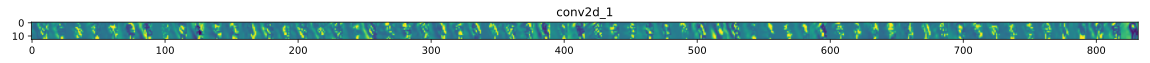

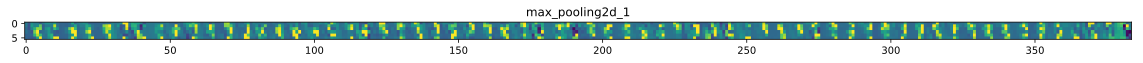

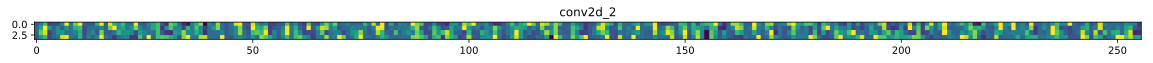

In [ ]:
img_path='/content/bird1.jpg'
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 79ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


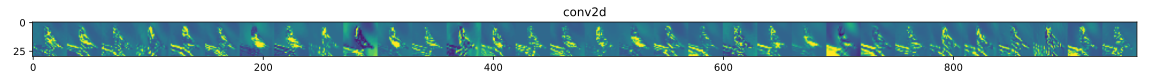

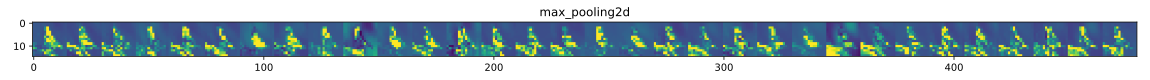

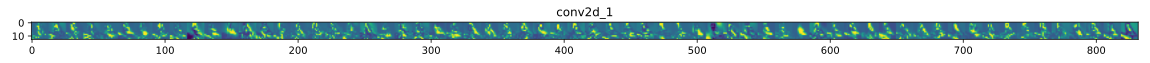

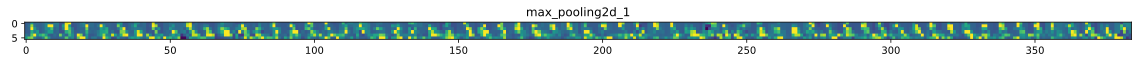

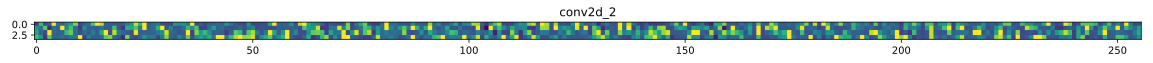

In [ ]:
img_path='/content/sparrow.jpg'
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 83ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


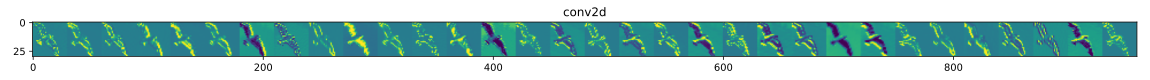

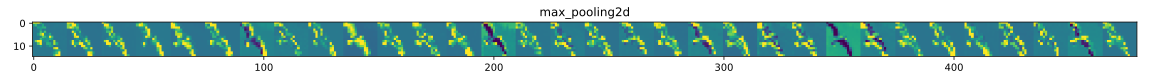

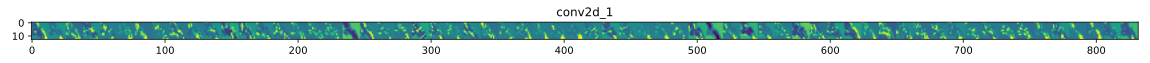

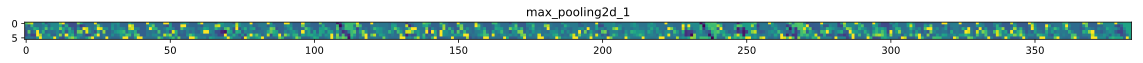

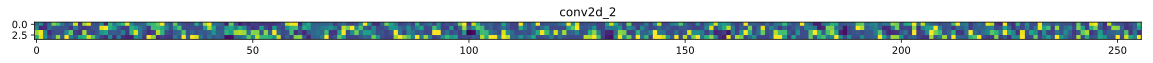

In [ ]:
img_path='/content/flying bird.jpg'
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 80ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


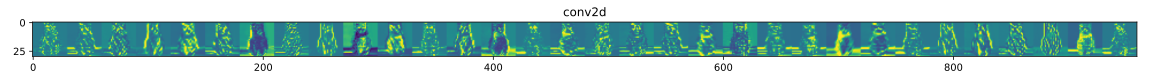

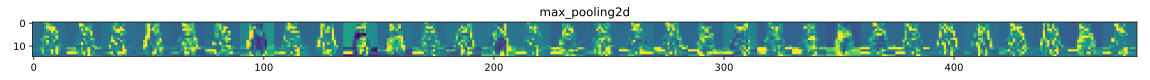

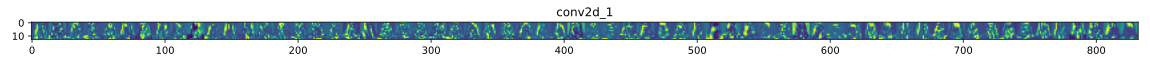

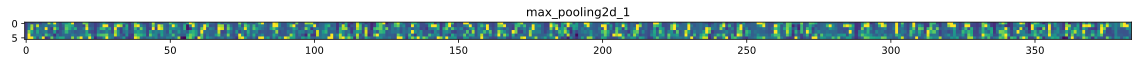

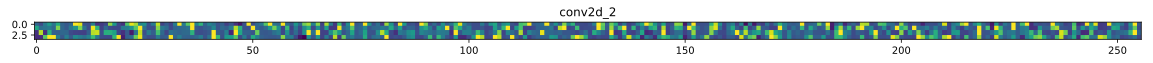

In [ ]:
img_path='/content/cat1.jpg' #dog
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 86ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


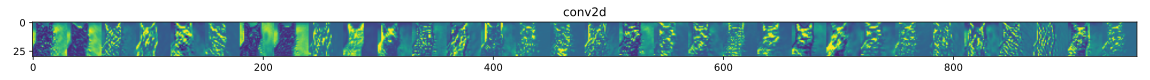

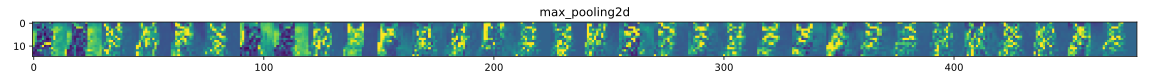

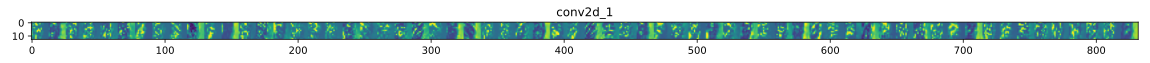

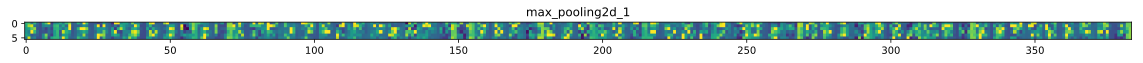

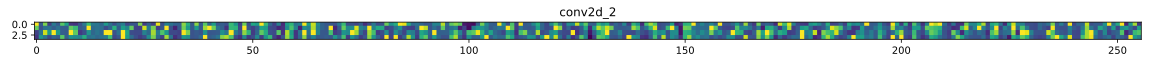

In [ ]:
img_path='/content/cat2.jpg' #dog
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 135ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 1024)
(1, 64)
(1, 10)


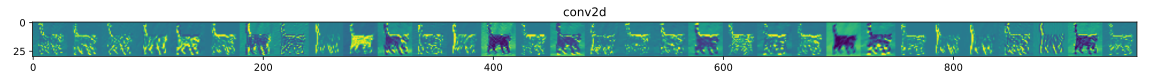

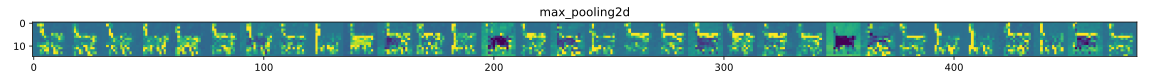

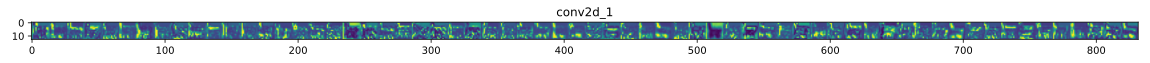

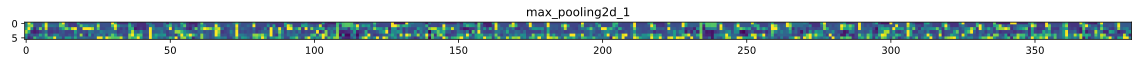

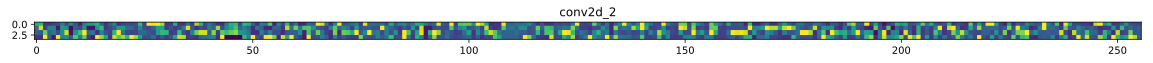

In [ ]:
img_path='/content/walking cat.jpg'
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )